In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
train_file = "E:\\INTERN\\pordigy\\task 2\\train.csv"
test_file = "E:\\INTERN\\pordigy\\task 2\\test.csv"
gender_submission_file = "E:\\INTERN\\pordigy\\task 2\\gender_submission.csv"

In [5]:
train_data = pd.read_csv(train_file)

In [7]:
train_data.head(), train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [9]:
print(train_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
train_data.loc[:, 'Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data.loc[:, 'Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [19]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)


In [21]:
print(train_data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


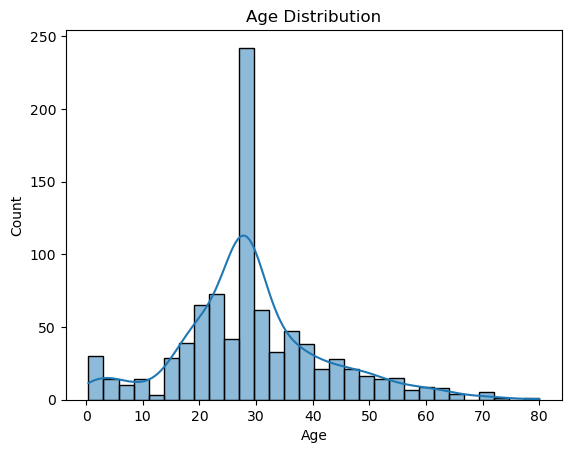

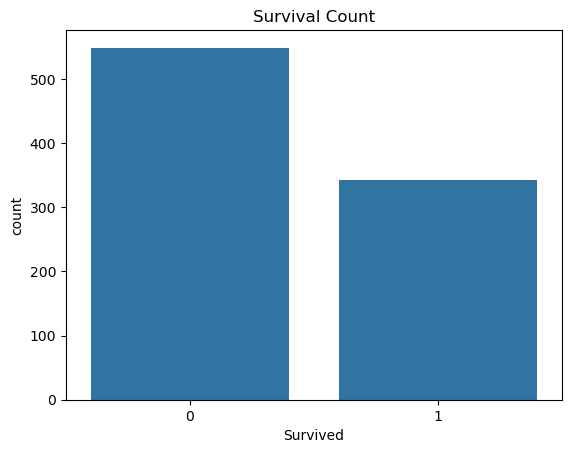

In [29]:
sns.histplot(train_data['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

sns.countplot(data=train_data, x='Survived')
plt.title("Survival Count")
plt.show()


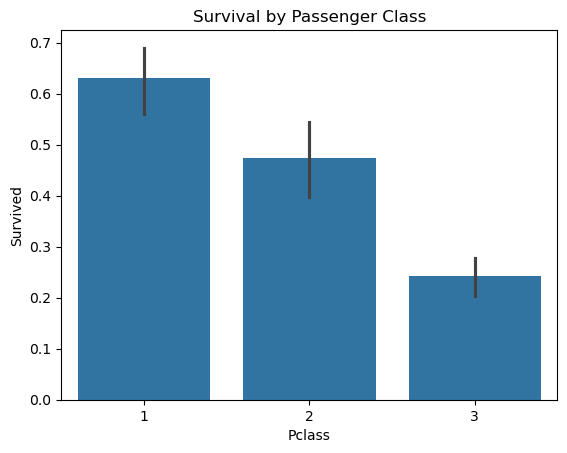

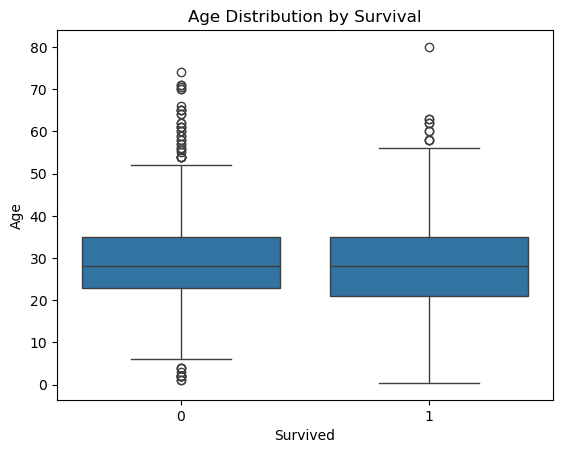

In [31]:
sns.barplot(data=train_data, x='Pclass', y='Survived')
plt.title("Survival by Passenger Class")
plt.show()

sns.boxplot(data=train_data, x='Survived', y='Age')
plt.title("Age Distribution by Survival")
plt.show()


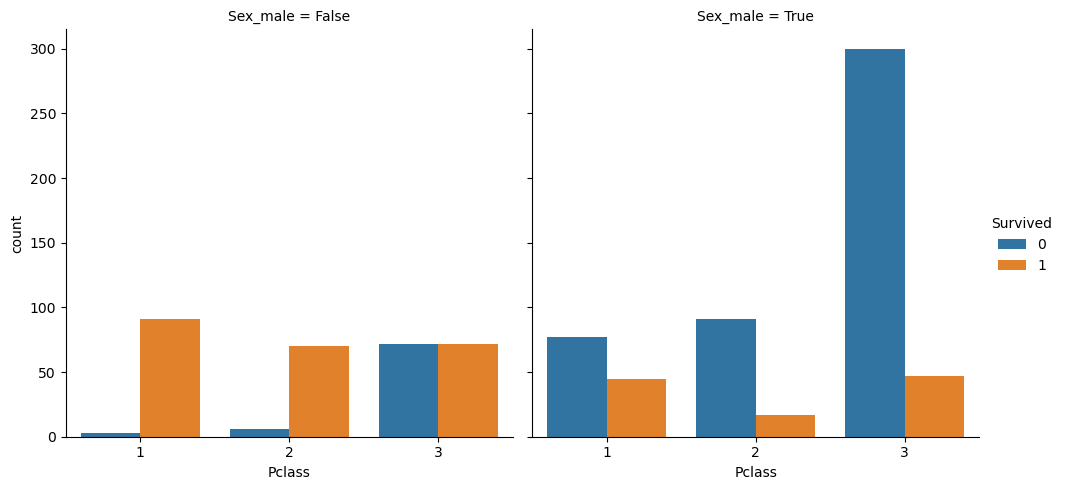

In [33]:
sns.catplot(data=train_data, x='Pclass', hue='Survived', col='Sex_male', kind='count')
plt.show()


In [37]:
corr_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()


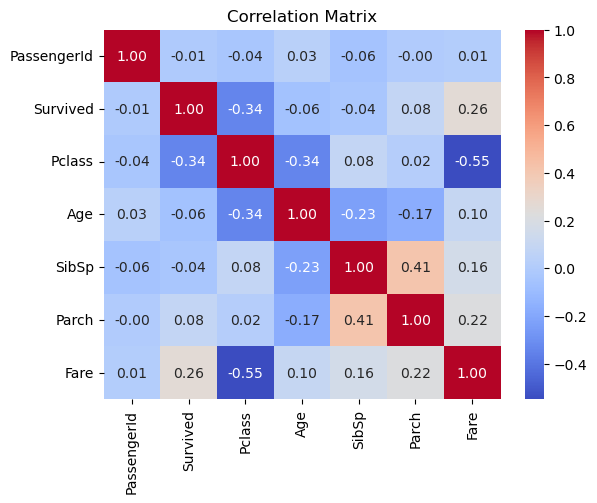

In [39]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [41]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

In [43]:
print(train_data[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


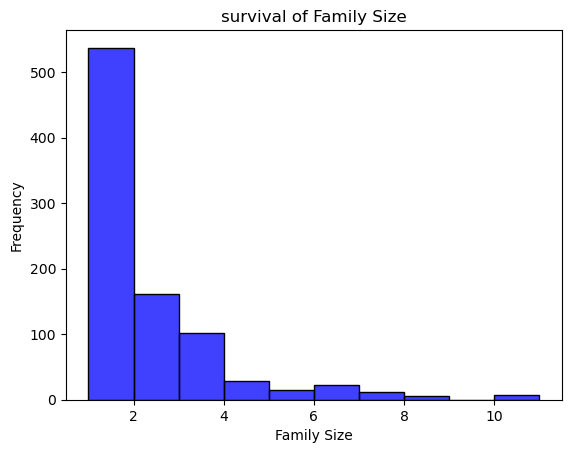

In [51]:
sns.histplot(train_data['FamilySize'], bins=10, kde=False, color='blue')
plt.title("survival of Family Size")
plt.xlabel("Family Size")
plt.ylabel("Frequency")
plt.show()

In [47]:
family_survival = train_data.groupby('FamilySize')['Survived'].mean()

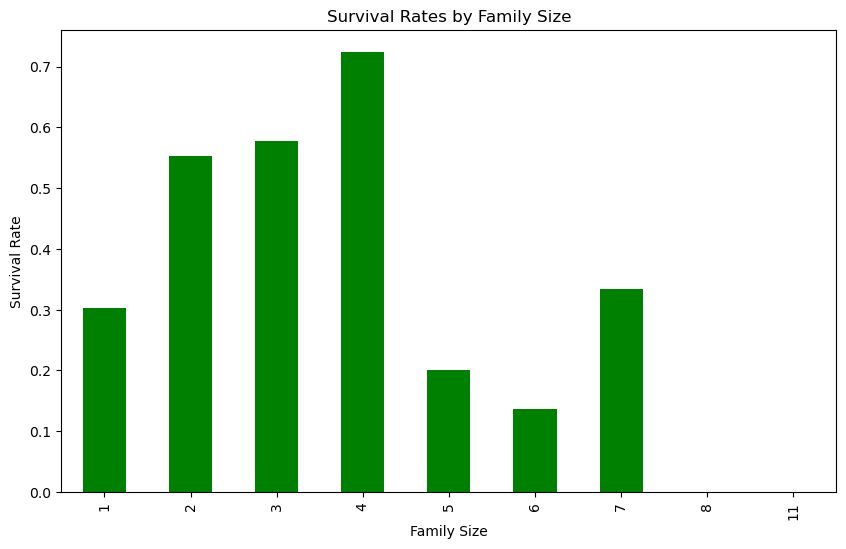

In [49]:
family_survival.plot(kind='bar', color='green', figsize=(10, 6))
plt.title("Survival Rates by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()

In [66]:
# Create family size feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1


In [68]:
train_data['Pclass'] = train_data['Pclass'].astype('category')


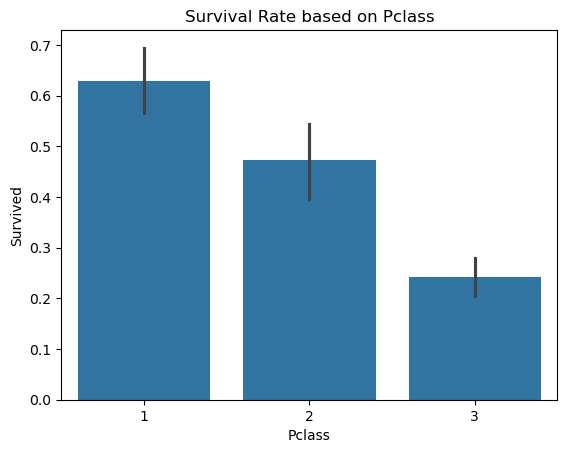

In [70]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate based on Pclass')
plt.show()



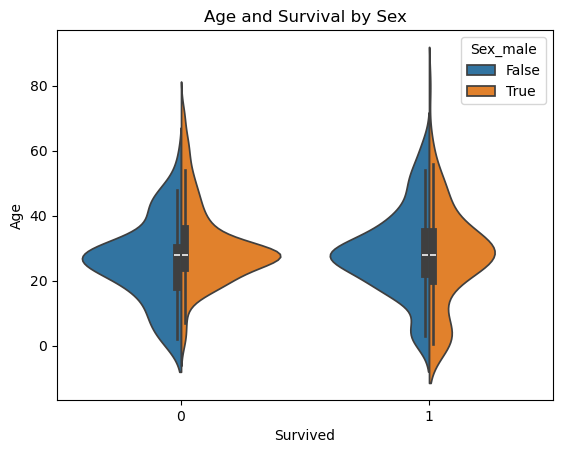

In [74]:
sns.violinplot(x='Survived', y='Age', hue='Sex_male', data=train_data, split=True)
plt.title('Age and Survival by Sex')
plt.show()


In [83]:
print([col for col in train_data.columns if 'Embarked' in col])


['Embarked_Q', 'Embarked_S']


In [117]:
train_data = pd.read_csv("E:\\INTERN\\pordigy\\task 2\\train.csv")
print(train_data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [113]:
# Reload the original dataset to check value counts
train_data = pd.read_csv("E:\\INTERN\\pordigy\\task 2\\train.csv")
print(train_data['Embarked'].value_counts())


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [96]:
# Summary statistics of the numerical columns
train_data.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
# Check all column names in train_data
print(train_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [100]:
train_data['Sex'].value_counts()
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

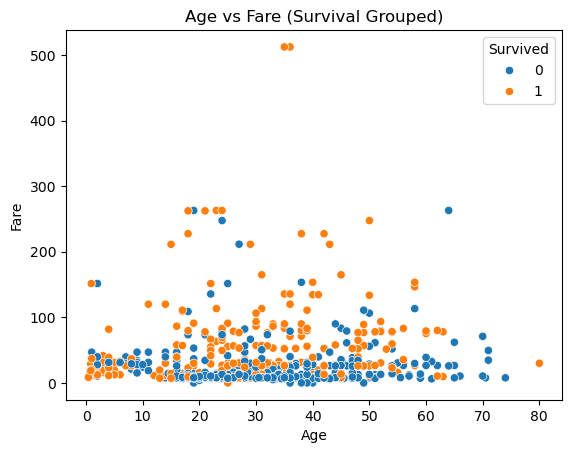

In [123]:
# Age vs Fare, grouped by survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Age vs Fare (Survival Grouped)')
plt.show()
